In [1]:
import numpy as np
from FlagRep import FlagRep
from matplotlib import pyplot as plt




In [2]:
#### NETWORK HEAD CHECK!

import torch
from PrototypicalFlagNetworks import PrototypicalFlagNetworks
from AlexNetLastTwoLayers import AlexNetLastTwoLayers
from torchvision.models import alexnet
from NetworkHeads import FlagNetHead, SubspaceNetHead

n_shot = 3
n_way = 2

ss2_0 = torch.rand((100))
ss2_0 = ss2_0/torch.linalg.norm(ss2_0)

ss1_0 = (torch.eye(100)-ss2_0.outer(ss2_0)).mm(torch.rand((100,1)))
ss1_0 = ss1_0/torch.linalg.norm(ss1_0)
ss1_0 = ss1_0.squeeze(-1)

ss2_1 = torch.rand((100))
ss2_1 = ss2_1/torch.linalg.norm(ss2_1)

ss1_1 = (torch.eye(100)-ss2_1.outer(ss2_1)).mm(torch.rand((100,1)))
ss1_1 = ss1_1/torch.linalg.norm(ss1_1)
ss1_1 = ss1_1.squeeze(-1)

query1 = torch.rand((7,100)).mm((ss1_0).outer(ss1_0))
query2 = torch.rand((7,100)).mm((ss2_0).outer(ss2_0))

support1 = torch.vstack([torch.rand((3,100)).mm(ss1_0.outer(ss1_0)),torch.rand((3,100)).mm(ss1_1.outer(ss1_1))])
support2 = torch.vstack([torch.rand((3,100)).mm(ss2_0.outer(ss2_0)),torch.rand((3,100)).mm(ss2_1.outer(ss2_1))])

support_labels = torch.tensor([0]*n_shot+[1]*n_shot)




SubspaceNetHead(query1, support1, support_labels, n_way, n_shot)


FlagNetHead(query1, query2, support1, support2, support_labels, n_way, n_shot)


tensor([[[-9.4780e-16, -3.0092e-02],
         [-8.2789e-16, -2.8123e-02],
         [-1.0799e-15, -4.7290e-02],
         [-7.3853e-16, -2.8811e-02],
         [-3.4618e-16, -2.6777e-02],
         [-1.4219e-15, -5.2263e-02],
         [-5.3490e-16, -3.4977e-02]]])

tensor([[[-6.0577e-15, -1.2219e-01],
         [-7.1627e-15, -1.1149e-01],
         [-8.3928e-15, -1.4096e-01],
         [-5.4463e-15, -1.0378e-01],
         [-5.9885e-15, -1.2910e-01],
         [-9.0298e-15, -1.4036e-01],
         [-4.2718e-15, -1.2432e-01]]])

In [2]:
n = 4956
p = 13

hidden_flag_type = [2,4]

hidden_ms = [2,2]
col_ids = [3,10]

np.random.seed(42)


D = []
for i in range(len(hidden_flag_type)):
    # Set dimensions
    rows = n
    cols = col_ids[i]

    # Generate a random matrix of rank < cols
    # First, create a matrix of lower rank (rank < cols)
    rank = hidden_ms[i] # Specify the desired rank
    low_rank_matrix = np.random.randn(rows, rank)

    if i > 0:
        # Multiply by another random matrix to get the final matrix with more columns
        random_matrix = (np.eye(n) - random_matrix @np.linalg.pinv(random_matrix.T @ random_matrix) @ random_matrix.T) @ low_rank_matrix @ np.random.randn(rank, cols)
    else:
        random_matrix =  low_rank_matrix @ np.random.randn(rank, cols)

    # Verify the rank of the matrix
    rank_of_matrix = np.linalg.matrix_rank(random_matrix)
    print(f'matrix rank is {rank_of_matrix}')

    D.append(random_matrix)

D = np.hstack(D)
print(D.shape)
print(f'total shape is {D.shape}, total rank is {np.linalg.matrix_rank(D)}')

matrix rank is 2
matrix rank is 2
(4956, 13)
total shape is (4956, 13), total rank is 4


In [4]:
As = [np.arange(2), np.arange(p)]

my_flag_rep = FlagRep(Aset = As, solver = 'svd',flag_type = [2,4])

In [6]:
np.linalg.svd(D)

SVDResult(U=array([[ 1.18298301e-03, -2.61534791e-03,  1.87848631e-03, ...,
        -3.85801196e-03, -1.93609017e-03, -1.72149206e-03],
       [ 9.27832220e-03, -1.14564754e-02,  2.33275741e-02, ...,
        -2.92000078e-02, -1.56132953e-02, -1.16447889e-02],
       [ 1.00330101e-02, -2.66082012e-02, -4.55433218e-03, ...,
        -1.06968494e-02,  2.31127262e-03, -2.94554987e-03],
       ...,
       [ 3.12793351e-03, -1.65422652e-02,  3.30481705e-02, ...,
         9.98275771e-01, -8.49751275e-04, -2.01243377e-04],
       [ 2.04076176e-02, -5.63159092e-04,  2.49706504e-02, ...,
        -1.04915521e-03,  9.96497644e-01, -7.22073461e-04],
       [ 6.01361183e-03,  5.30753507e-03,  1.34349267e-02, ...,
        -2.16713206e-04, -6.73557217e-04,  9.99373624e-01]]), S=array([3.01632822e+02, 1.81732457e+02, 1.08900383e+02, 8.05033821e+01,
       1.09892130e-13, 1.09322535e-13, 9.12685616e-14, 1.67628118e-14,
       1.25493045e-14, 1.18019674e-14, 8.17298460e-15, 5.17631173e-15,
       4.896265

In [5]:
my_flag_rep.fit_transform(D)

(array([[-0.00233031,  0.00689736, -0.00118298, -0.00261535],
        [-0.02309193, -0.00438564, -0.00927832, -0.01145648],
        [ 0.00462239, -0.00090035, -0.01003301, -0.0266082 ],
        ...,
        [-0.03241671, -0.01079654, -0.00312793, -0.01654227],
        [-0.02510867,  0.00131564, -0.02040762, -0.00056316],
        [-0.0131354 , -0.00504857, -0.00601361,  0.00530754]]),
 array([[ 1.12156960e+01, -1.08061078e+02,  5.80711332e+00,
         -5.55111512e-17, -6.10622664e-16, -1.75554016e-15,
         -1.44328993e-15, -4.16333634e-16, -1.11022302e-15,
          6.66133815e-16, -1.36002321e-15, -4.16333634e-16,
          2.05391260e-15],
        [-5.37185643e+01, -5.57546801e+00,  5.98882874e+01,
          1.52655666e-16, -3.60822483e-16, -5.13478149e-16,
          8.04911693e-16,  7.21644966e-16,  7.77156117e-16,
         -1.38777878e-16, -1.92901251e-15, -6.93889390e-18,
         -2.49800181e-16],
        [ 0.00000000e+00,  0.00000000e+00,  9.63286089e-17,
          1.0015521

,Method,Accuracy,Number Shots
0,FlagRep,0.8782,1
0,QR,0.8782,1
0,SVD,0.8659,1
0,Euclidean,0.8357,1
0,Baseline,0.9736,1
...,...,...,...
0,FlagRep,0.9555,10
0,QR,0.9109,10
0,SVD,0.9559,10
0,Euclidean,0.9614,10


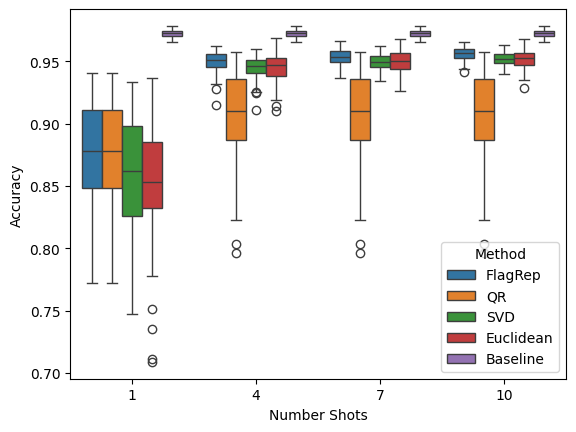

In [3]:
import pandas as pd
import seaborn as sns

results = pd.read_csv('../results/mnist_fewshot_idea.csv', index_col = 0)
sns.boxplot(data = results, x = 'Number Shots', y = 'Accuracy', hue = 'Method')
results

In [2]:
def my_svd(C: np.array, eps_rank: float = 1, zero_tol: float = 1e-8, n_vecs: int = 0) -> np.array:
    U,S,Vh = np.linalg.svd(C, full_matrices=True)

    if n_vecs > 0:
        U = U[:,:n_vecs]
        S = S[:n_vecs]
        Vh = Vh[:n_vecs]

    else:
        nnz_ids = ~np.isclose(S, 0, atol=zero_tol)
        U = U[:,:len(S)][:,nnz_ids]
        S = S[nnz_ids]
        Vh = Vh[nnz_ids,:]

        s_prop = np.cumsum(S**2)/np.sum(S**2)
        good_idx = s_prop<=eps_rank
        U = U[:,good_idx]
        S = S[good_idx]
        Vh = Vh[good_idx,:]

    return U, S, Vh

In [3]:
n = 10
p = 13

hidden_flag_type = [2,4]

hidden_ms = [2,2]
col_ids = [3,10]

np.random.seed(42)


D = []
for i in range(len(hidden_flag_type)):
    # Set dimensions
    rows = n
    cols = col_ids[i]

    # Generate a random matrix of rank < cols
    # First, create a matrix of lower rank (rank < cols)
    rank = hidden_ms[i] # Specify the desired rank
    low_rank_matrix = np.random.randn(rows, rank)

    if i > 0:
        # Multiply by another random matrix to get the final matrix with more columns
        random_matrix = (np.eye(n) - random_matrix @np.linalg.pinv(random_matrix.T @ random_matrix) @ random_matrix.T) @ low_rank_matrix @ np.random.randn(rank, cols)
    else:
        random_matrix =  low_rank_matrix @ np.random.randn(rank, cols)

    # Verify the rank of the matrix
    rank_of_matrix = np.linalg.matrix_rank(random_matrix)
    print(f'matrix rank is {rank_of_matrix}')

    D.append(random_matrix)

D = np.hstack(D)
print(D.shape)
print(f'total shape is {D.shape}, total rank is {np.linalg.matrix_rank(D)}')

matrix rank is 2
matrix rank is 2
(10, 13)
total shape is (10, 13), total rank is 4


In [4]:
np.linalg.matrix_rank(D[:,:3])

2

In [5]:
for i in range(1,p):
    print([i,p])
    As = [np.arange(i), np.arange(p)]

    my_flag_rep = FlagRep(Aset = As, solver = 'svd')
    X = my_flag_rep.fit_transform(D)
    D_out0 = my_flag_rep.inverse_transform(X)
    print(f'FlagRep err: {np.linalg.norm(D_out0-D)}')
    print(f'Flag type {my_flag_rep.flag_type()}')
    print()


    # U,S,Vh = my_svd(D)
    # D_out1 = U @ U.T @ D
    # print(f'svd err: {np.linalg.norm(D_out1-D)}')

# plt.figure()
# plt.imshow(D_out0-D_out1, cmap = 'grey')
# plt.colorbar()

my_flag_rep = FlagRep(Aset = [np.arange(p)])
X = my_flag_rep.fit_transform(D)
D_out0 = my_flag_rep.inverse_transform(X)
print(f'FlagRep err: {np.linalg.norm(D_out0-D)}')

[1, 13]
number of subspaces in flag shorter than number feature sets
... estimating reconstruction using final part of flag
FlagRep err: 1.9602154974374674e-14
Flag type [4]

[2, 13]
FlagRep err: 1.9293968115638844
Flag type [1 4]

[3, 13]
FlagRep err: 7.185414357283517e-15
Flag type [2 4]

[4, 13]
FlagRep err: 4.21574550487192e-15
Flag type [3 4]

[5, 13]
number of subspaces in flag shorter than number feature sets
... estimating reconstruction using final part of flag
FlagRep err: 4.8435411713740675e-15
Flag type [4]

[6, 13]
number of subspaces in flag shorter than number feature sets
... estimating reconstruction using final part of flag
FlagRep err: 7.10311471695899e-15
Flag type [4]

[7, 13]
number of subspaces in flag shorter than number feature sets
... estimating reconstruction using final part of flag
FlagRep err: 7.943536138280146e-15
Flag type [4]

[8, 13]
number of subspaces in flag shorter than number feature sets
... estimating reconstruction using final part of flag
Fla

In [6]:
As = [np.arange(4), np.arange(p)]
my_flag_rep = FlagRep(Aset = As, solver = 'svd')
X, R = my_flag_rep.decompose(D)

my_flag_rep.flag_type()

array([3, 4])

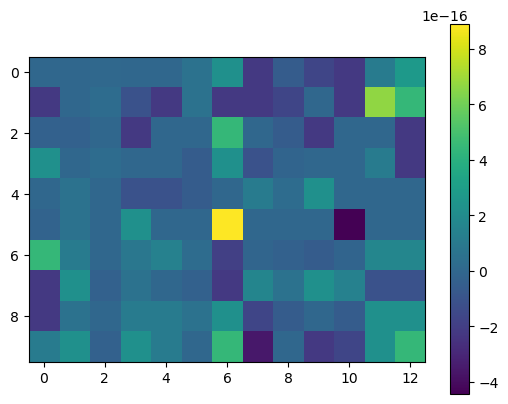

In [7]:
plt.imshow(X @ R- my_flag_rep.inverse_transform(X))
plt.colorbar()

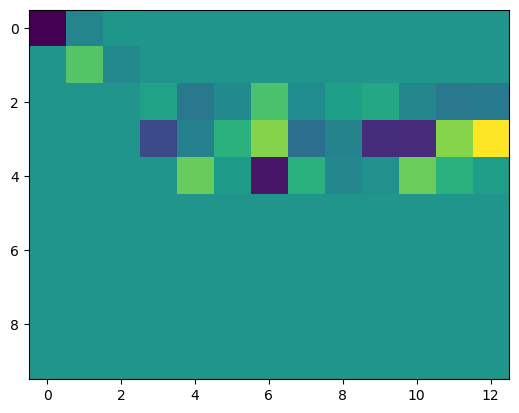

In [8]:
Q, R = np.linalg.qr(D)

plt.imshow(R)

In [9]:
D

array([[ 9.25000299e-01, -3.68775869e-02,  1.82055806e-02,
         1.28833422e-01, -1.01957720e+00, -1.91571459e-01,
         1.84935958e+00, -4.37066301e-01,  2.74793070e-01,
         2.30431148e-01, -9.19431642e-01, -6.33548173e-01,
        -3.70719170e-01],
       [-1.22065012e+00, -9.75343865e-01,  2.12675660e-01,
         6.58876113e-01, -1.22034852e+00, -4.53026176e-01,
         1.97524932e+00, -3.23959016e-01,  4.83472392e-01,
         9.51673146e-01, -5.73355710e-01, -1.33559406e+00,
        -1.28763117e+00],
       [-9.60040066e-03,  1.80326397e-01, -4.17830346e-02,
        -1.28058899e+00, -1.16601708e+00,  4.13940238e-01,
         2.78916853e+00, -1.06338217e+00, -1.23075109e-01,
        -1.64877395e+00, -2.54294490e+00,  9.08845180e-01,
         1.96380449e+00],
       [ 1.22117008e+00, -7.74327036e-01,  1.91767254e-01,
         7.97129241e-01,  5.40706933e-01, -2.82076460e-01,
        -1.38938062e+00,  5.73343856e-01,  1.19335785e-01,
         1.03682456e+00,  1.39155534e

# Trying with HS data

In [54]:
import scipy.io as sio

# Load the hyperspectral image and ground truth
data = sio.loadmat('../data/indian_pines/Indian_pines_corrected.mat')['indian_pines_corrected'] 
labels = sio.loadmat('../data/indian_pines/Indian_pines_gt.mat')['indian_pines_gt']  # Shape: (145, 145)


print(data.shape)

(145, 145, 200)


In [55]:
def extract_patches_of_class(data, labels, patch_size, target_class):
    """
    Extract patches where all pixels in the patch are of the target class.

    :param data: The hyperspectral image data (145x145x220).
    :param labels: The ground truth labels (145x145).
    :param patch_size: Size of the patch (e.g., 7 for 7x7 patches).
    :param target_class: The class for which patches should be extracted.
    :return: A list of patches (each patch is of size patch_size x patch_size x num_bands).
    """
    half_patch = patch_size // 2
    patches = []
    patch_labels = []

    # Iterate through the image, avoiding border pixels (due to patch size)
    for i in range(half_patch, data.shape[0] - half_patch):
        for j in range(half_patch, data.shape[1] - half_patch):
            if labels[i, j] == target_class:
                # Extract the patch from both the data and the labels
                label_patch = labels[i - half_patch:i + half_patch + 1, j - half_patch:j + half_patch + 1]
                
                # Check if all pixels in the label patch are of the target class
                if np.all(label_patch == target_class):
                    # Extract the corresponding data patch
                    patch = data[i - half_patch:i + half_patch + 1, j - half_patch:j + half_patch + 1, :]
                    patches.append(patch)
                    patch_labels.append(target_class)

    return np.array(patches), np.array(patch_labels)

In [56]:
def extract_patches(data, labels, patch_size, class_ids):
    # extract patches
    mod_data = []
    mod_labels = []
    for target_class in class_ids:
        patches, patch_labels = extract_patches_of_class(data, labels, patch_size, target_class)
        if len(patches) > 0:
            flat_patches = []
            for patch in patches:
                # Your 3D array of size 11x11x200
                array_3d = patch  # Example array

                center_x, center_y = patch_size//2, patch_size//2

                # Create a list of all (x, y) coordinates and compute their Manhattan distances from the center
                coords = [(x, y) for x in range(patch_size) for y in range(patch_size)]
                distances = [(x, y, max(abs(x - center_x), abs(y - center_y))) for x, y in coords]

                # Sort coordinates by distance
                sorted_coords = sorted(distances, key=lambda item: item[2])

                # Create the 2D array by unwrapping the 3D array based on sorted coordinates
                flat_patch = np.array([array_3d[x, y, :] for x, y, _ in sorted_coords])
                flat_patches.append(flat_patch.T)

                # Create a hierarchy vector containing the Chebyshev distances in the same sorted order
                hierarchy_vector = np.array([distance for _, _, distance in sorted_coords])

                # Find the indices where the hierarchy vector changes value
                change_indices = np.where(np.diff(hierarchy_vector) != 0)[0] + 1  # Add 1 because diff reduces length by 1

            change_indices = np.hstack([change_indices,np.array(len(hierarchy_vector))])
            mod_labels +=[target_class]*len(patches)
            
            mod_data += flat_patches

            Aset = [np.arange(i) for i in change_indices]

        else:
            print(f'No patches of class id {target_class}')

    
        print(f"Extracted {len(patches)} patches where all pixels are of class {target_class}. Each patch has shape {patch_size}.")

    return mod_data, mod_labels, Aset

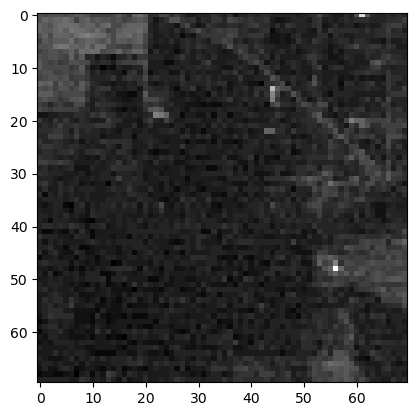

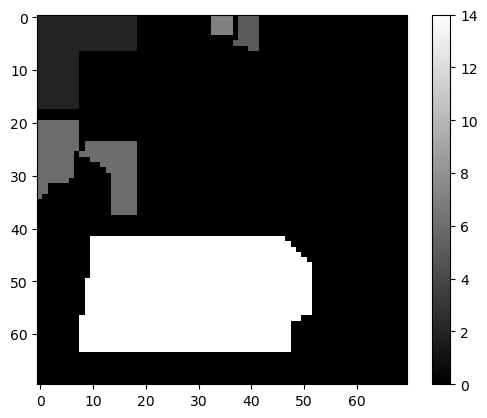

In [57]:
# patch_data, patch_labels, Aset = extract_patches(data, labels, 11, np.arange(16))

# D = patch_data[0]
# D.shape
plt.figure()
plt.imshow(data[-70:,-70:,2], cmap = 'grey')

plt.figure()
plt.imshow(labels[-70:,-70:], cmap = 'grey')
plt.colorbar()

In [58]:
np.where(labels!=0)

(array([  0,   0,   0, ..., 143, 143, 143]),
 array([ 0,  1,  2, ..., 30, 31, 32]))

In [59]:
D = np.reshape(data[:70,:70,:], (-1,200))
# D = np.reshape(data/data.max(), (-1,200))

In [60]:
np.linalg.matrix_rank(D), D.shape, len(D)

(200, (4900, 200), 4900)

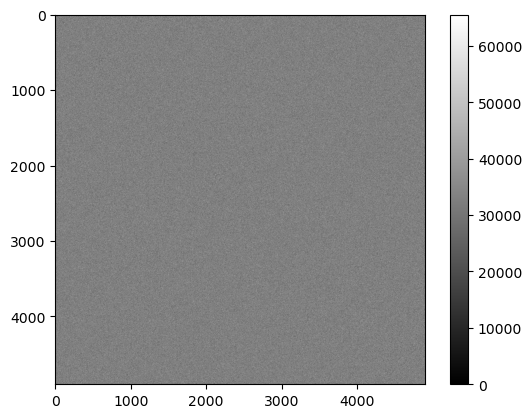

In [61]:
plt.imshow(D @ D.T, cmap = 'grey')
plt.colorbar()

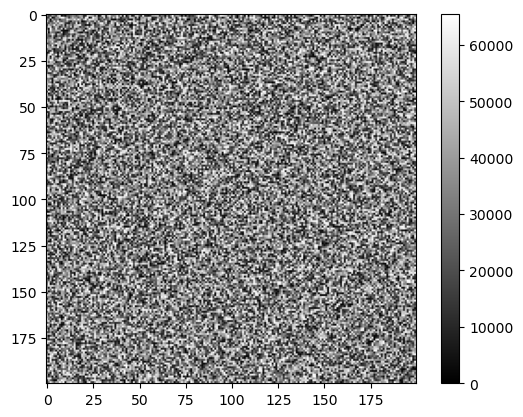

In [62]:
plt.imshow(D.T @ D, cmap = 'grey')
plt.colorbar()

Correlation Matrix:
[[1.         0.34711042 0.3729944  ... 0.3757029  0.38535294 0.3902903 ]
 [0.34711042 1.         0.86431582 ... 0.79744407 0.78156561 0.7710552 ]
 [0.3729944  0.86431582 1.         ... 0.77959546 0.75768705 0.74266218]
 ...
 [0.3757029  0.79744407 0.77959546 ... 1.         0.99051755 0.98373641]
 [0.38535294 0.78156561 0.75768705 ... 0.99051755 1.         0.99376419]
 [0.3902903  0.7710552  0.74266218 ... 0.98373641 0.99376419 1.        ]]


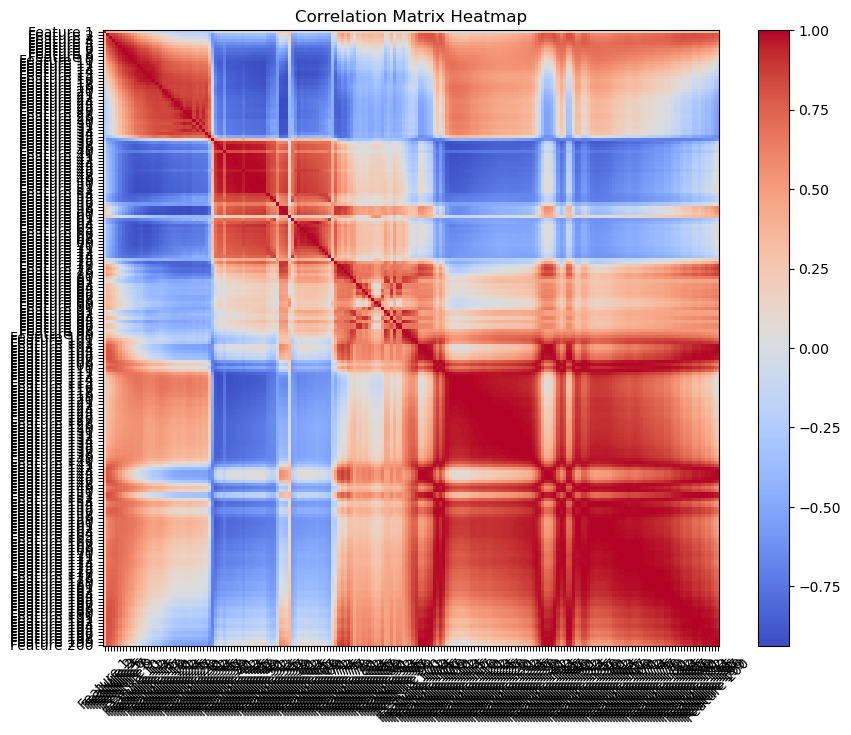

In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

n_samples, n_features  = D.shape

# Normalize the data
X_normalized = normalize(D)

# Create a DataFrame for easier handling
df = pd.DataFrame(X_normalized, columns=[f'Feature {i+1}' for i in range(n_features)])

# Generate the correlation matrix
correlation_matrix = np.array(df.corr())

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(n_features), labels=df.columns, rotation=45)
plt.yticks(ticks=np.arange(n_features), labels=df.columns)
plt.show()

/var/folders/5m/bv9phk393431tllslwr8yzyw0000gp/T/ipykernel_56080/555422073.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1-correlation_matrix, method='ward')  # You can choose other methods like 'single', 'complete', etc.


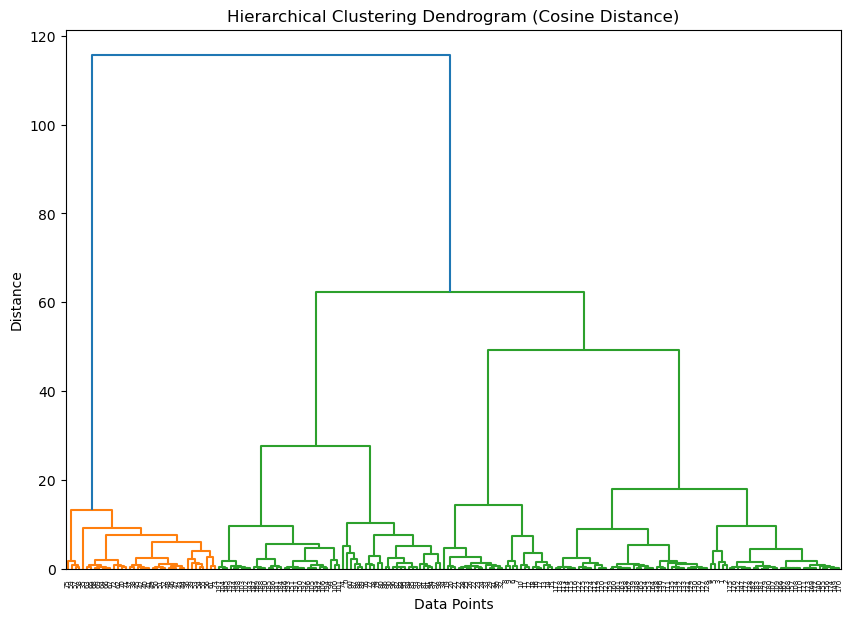

In [64]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt


# Perform hierarchical clustering
Z = linkage(1-correlation_matrix, method='ward')  # You can choose other methods like 'single', 'complete', etc.

# Define the number of clusters
num_clusters = 3

# Assign cluster memberships
clusters = fcluster(Z, num_clusters, criterion='maxclust')


# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Cosine Distance)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()



In [66]:
[len(np.where(clusters==i)[0]) for i in range(1,4)]

[39, 58, 103]

In [68]:
Aset = [ np.where(clusters==3)[0], 
        np.concatenate((np.where(clusters==3)[0],np.where(clusters==2)[0])), 
        np.concatenate((np.where(clusters==3)[0],np.where(clusters==2)[0],np.where(clusters==1)[0]))]

In [69]:
B = np.hstack([D[:,np.where(clusters==3)[0]],D[:,np.where(clusters==2)[0]], D[:,np.where(clusters==1)[0]]])

Correlation Matrix:
[[ 1.          0.86431582  0.86508847 ... -0.41407219 -0.43337585
   0.0397956 ]
 [ 0.86431582  1.          0.90757902 ... -0.50025855 -0.51383473
  -0.04201589]
 [ 0.86508847  0.90757902  1.         ... -0.58049816 -0.58085648
  -0.14672122]
 ...
 [-0.41407219 -0.50025855 -0.58049816 ...  1.          0.77495327
   0.65266361]
 [-0.43337585 -0.51383473 -0.58085648 ...  0.77495327  1.
   0.57719434]
 [ 0.0397956  -0.04201589 -0.14672122 ...  0.65266361  0.57719434
   1.        ]]


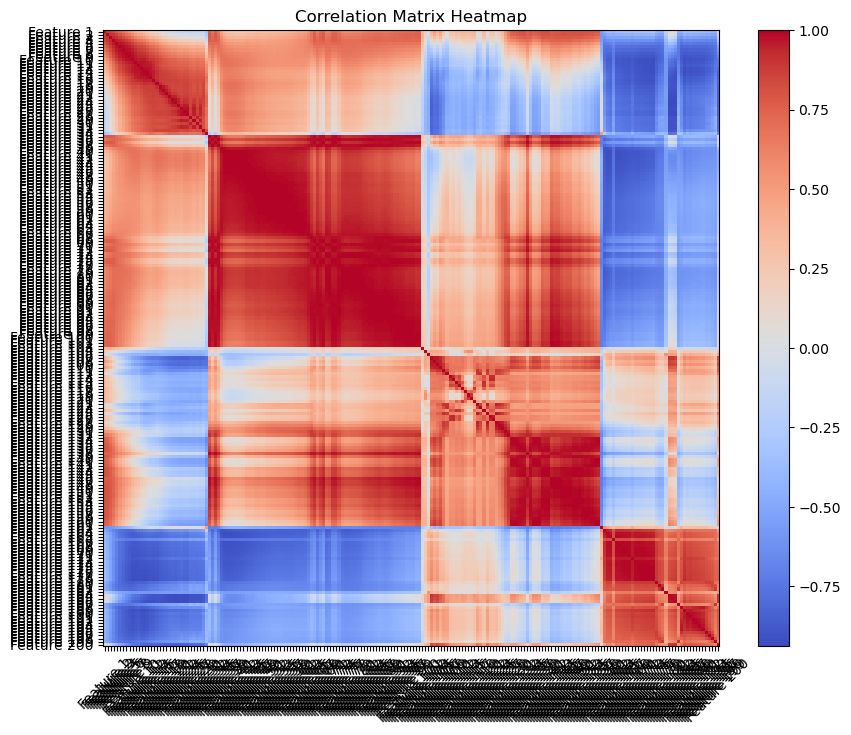

In [73]:
# Normalize the data
X_normalized = normalize(B)

# Create a DataFrame for easier handling
df = pd.DataFrame(X_normalized, columns=[f'Feature {i+1}' for i in range(n_features)])

# Generate the correlation matrix
correlation_matrix = np.array(df.corr())

# Output the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(n_features), labels=df.columns, rotation=45)
plt.yticks(ticks=np.arange(n_features), labels=df.columns)
plt.show()

[ 6 37 74]


384938.4295489319

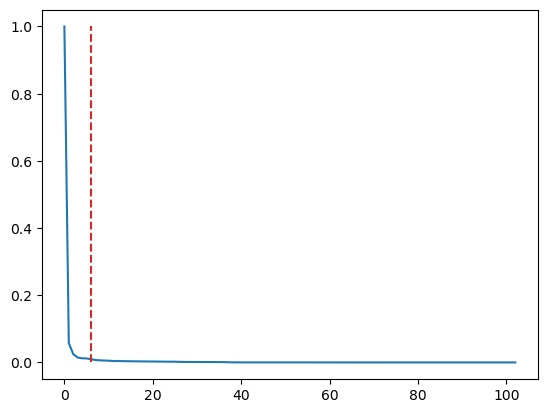

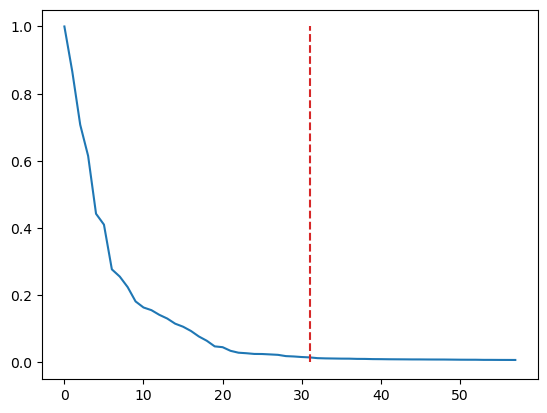

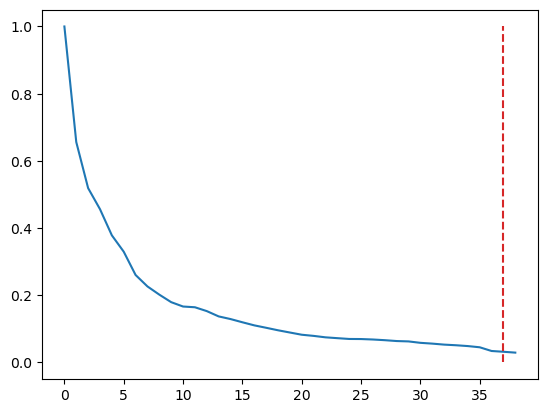

In [71]:

my_flag_rep = FlagRep(Aset = Aset, solver = 'svd', plot_eigs = True)
X, R = my_flag_rep.decompose(D)
print(my_flag_rep.flag_type())
np.sum(np.linalg.norm(X @ R - B, axis = 1)**2)/len(B)

In [74]:
U,S,_ = np.linalg.svd(D, full_matrices = False)
# S = S/S.max()
# s_diff = np.abs(np.diff(S))
# n_vecs = np.sum(s_diff >= 1e-3)
n_vecs = 74
U = U[:,:n_vecs]
np.sum(np.linalg.norm(U @ U.T @ D - D, axis = 1)**2)/len(D)

26332.77478122518

In [21]:
my_flag_rep = FlagRep(Aset = Aset, solver = 'qr')
X0 = my_flag_rep.fit_transform(D)

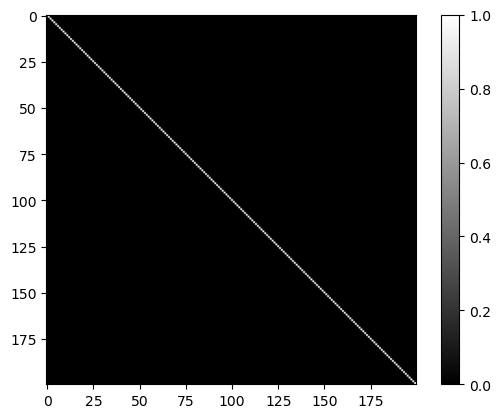

In [22]:
plt.imshow(X0.T @ X0, cmap = 'grey')
plt.colorbar()

In [19]:
my_flag_rep = FlagRep(Aset = Aset, solver = 'svd')
X1 = my_flag_rep.fit_transform(D)

In [20]:
from FlagRep0 import chordal_distance
def make_Bs(fl_type):
    Bs = [np.arange(fl_type[0])]
    for i in range(1,len(fl_type)):
        Bs.append(np.arange(fl_type[i-1],fl_type[i]))
    return Bs

Bs = make_Bs(my_flag_rep.flag_type_)

chordal_distance(X0, X1, Bs, Bs)

10.287740189236015

In [21]:
X0.T @ X0, X1.T @ X1

(array([[ 1.00000170e+00,  1.55515597e-08, -1.03468005e-08, ...,
         -5.98630436e-06,  7.16649892e-06,  2.64041769e-06],
        [ 1.55515597e-08,  1.00000100e+00, -1.16195221e-08, ...,
         -2.06995591e-07,  7.64740635e-08,  8.54731863e-08],
        [-1.03468005e-08, -1.16195221e-08,  1.00000060e+00, ...,
         -7.60223027e-08, -2.80733059e-09,  1.11947033e-10],
        ...,
        [-5.98630436e-06, -2.06995591e-07, -7.60223027e-08, ...,
          1.00000000e+00,  7.37257477e-18, -2.07082615e-17],
        [ 7.16649892e-06,  7.64740635e-08, -2.80733059e-09, ...,
          7.37257477e-18,  1.00000000e+00, -3.25260652e-17],
        [ 2.64041769e-06,  8.54731863e-08,  1.11947033e-10, ...,
         -2.07082615e-17, -3.25260652e-17,  1.00000000e+00]]),
 array([[ 1.00000000e+00,  5.84601811e-16,  3.34367950e-16, ...,
         -1.17992421e-13,  3.88881635e-14,  1.92484917e-14],
        [ 5.84601811e-16,  1.00000000e+00,  1.79543880e-16, ...,
         -9.87719021e-15,  3.26474958e

In [22]:

U,S,Vh = my_svd(D[:,:100])


n_2 = 100
p = 100
errs = []
flag_types = []
n1s = []
the_As = []
for n_1 in range(5,40,5): #loop through every feature combination between {1,2,...,n_1} \subset {1,...,220}
    As = [np.arange(n_1),  np.arange(40), np.arange(100)]
    the_As.append(As)

    my_flag_rep = FlagRep(Aset = As, flag_type=[5,10,20])

    
    X = my_flag_rep.fit_transform(D[:,:n_2])
    D_out0 = my_flag_rep.inverse_transform(X)
    D_out1 = my_flag_rep.inverse_transform(U)
    err0 = np.linalg.norm(D_out0[:,:n_2]-D[:,:n_2])**2
    errs.append(err0)

    # if ~np.isclose(err0,0):
    print()
    # print(np.array([n_1,n_2]))/
    print(my_flag_rep.flag_type())
    print(err0)
    print(np.linalg.norm(D_out1[:,:n_2]-D[:,:n_2])**2)

    # U,_,_ = my_svd(D[:,:n_2], n_vecs = my_flag_rep.flag_type()[-1])
    # D_out1 = U[:,:my_flag_rep.flag_type()[-1]] @ U[:,:my_flag_rep.flag_type()[-1]].T @ D[:,:n_2]
    # err1 = np.linalg.norm(D_out1[:,:n_2] - D[:,:n_2])**2
    
    
    # if ~np.isclose(err0, 0) and np.abs(err0-err1) < 1000000:
    # print()
    # print(np.array([n_1,n_2]))
    # print(my_flag_rep.flag_type())
    # print(err0, err1)

    flag_types.append(my_flag_rep.flag_type())
    n1s.append(n_1)


[ 5 10 20]
3100972259.4904637
4336277130.775746

[ 5 10 20]
2923413523.948477
4350743309.659885

[ 5 10 20]
2775665816.726906
4362474178.788054


KeyboardInterrupt: 

In [20]:

U,S,Vh = my_svd(D[:,:n_2])
D_out1 = U @ U.T @ D[:,:n_2]

In [21]:
n1s[np.argmin(errs)]

25

In [22]:
# np.sort(errs), 
np.sum(np.isclose(errs, 0))

np.int64(0)

In [23]:

U,S,Vh = my_svd(D[:,:n_2])
np.linalg.norm(D[:,:n_2] - U @ U.T @ D[:,:n_2])**2

np.float64(0.006975961577750164)

Text(0, 0.5, 'reconstruction error')

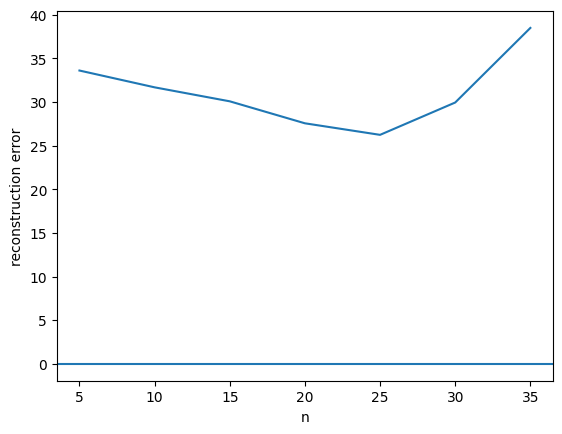

In [24]:
fig, ax = plt.subplots()
ax.plot(n1s, errs)
ax.axhline(np.linalg.norm(D_out1-D[:,:n_2])**2)
plt.xlabel('n')
plt.ylabel('reconstruction error')
# ax.set_yscale('log')

In [15]:
errs[-1], np.linalg.norm(D_out1-D[:,:n_2])**2

(np.float64(24089515415.602745), np.float64(4.295490191164382e-18))

In [42]:
S = np.random.normal(size = (5,5))
S

array([[-1.51936997, -0.48423407,  1.26691115, -0.70766947,  0.44381943],
       [ 0.77463405, -0.92693047, -0.05952536, -3.24126734, -1.02438764],
       [-0.25256815, -1.24778318,  1.6324113 , -1.43014138, -0.44004449],
       [ 0.13074058,  1.44127329, -1.43586215,  1.16316375,  0.01023306],
       [-0.98150865,  0.46210347,  0.1990597 , -0.60021688,  0.06980208]])

In [46]:
S[np.array([2,3,4]),:][:,np.array([2,3,4])]

array([[ 1.6324113 , -1.43014138, -0.44004449],
       [-1.43586215,  1.16316375,  0.01023306],
       [ 0.1990597 , -0.60021688,  0.06980208]])

In [47]:
S[2:5,2:5]

array([[ 1.6324113 , -1.43014138, -0.44004449],
       [-1.43586215,  1.16316375,  0.01023306],
       [ 0.1990597 , -0.60021688,  0.06980208]])

# Try Weizmann data

In [17]:
import os
import cv2

from skimage.transform import rescale


def load_avi_files(directory):
    avi_files = []
    for filename in os.listdir(directory):
        if filename.endswith('.avi'):
            avi_files.append(os.path.join(directory, filename))
    return avi_files


def read_avi_to_numpy(file_path, coarsen = .03):
    cap = cv2.VideoCapture(file_path)
    if not cap.isOpened():
        print(f"Error opening video file: {file_path}")
        return None

    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray_frame)

    cap.release()

    frame_array = np.array(frames)

    X = rescale(frame_array,(1,coarsen,coarsen))
    

    # Convert list of frames to a NumPy array
    return X


directory = '../data/weizmann/'  # Change to your directory

classes = ['bend', 'jack', 'run']


dataset = []
mod_labels = []
for class_name in classes:
    f_path = os.path.join(directory, class_name)
    avi_files = load_avi_files(f_path)
    data = [read_avi_to_numpy(avi_file, .03) for avi_file in avi_files]
    dataset += data
    mod_labels += [class_name]*len(data)

In [20]:
fewest_frame_count = np.min([len(d) for d in dataset])
_,n_rows, n_cols  = dataset[0].shape

trimmed_dataset = []
for d in dataset:
    n_frames = len(d)
    d_trimmed = d[n_frames//2-fewest_frame_count//2:n_frames//2+fewest_frame_count//2,:,:]
    trimmed_dataset.append(d_trimmed)

center_row = n_rows//2
center_col = n_cols//2

quarter_row = n_rows//4
quarter_col = n_cols//4

X = []
for d in trimmed_dataset:
    ss1 = d[:,n_rows//4:3*n_rows//4, n_cols//4:3*n_cols//4]
    ss2_mask = np.zeros((n_rows, n_cols), dtype=bool)
    # Set the outer pixels to True
    ss2_mask[:n_rows//4, :] = True  # Top
    ss2_mask[3*n_rows//4:, :] = True  # Bottom
    ss2_mask[:, :n_cols//4] = True  # Left
    ss2_mask[:, 3*n_cols//4+1:] = True  # Right

    
    # plt.axis('off')
    ss2 = d[:,ss2_mask]

    ss1 = ss1.reshape(ss1.shape[0], -1)
    ss2 = ss2.reshape(ss2.shape[0], -1)

    d_flat = np.hstack([ss1,ss2])


    X.append(d_flat)

ss_sizes = [ss1.shape[1], ss2.shape[1]]



In [22]:
As = [np.arange(len(ss1.T)), np.arange(len(ss1.T)+len(ss2.T))]

In [34]:
print(As)

[array([0, 1, 2, 3]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])]


In [35]:
D = X[6]

my_flagrep = FlagRep(Aset = As)
my_flag = my_flagrep.fit_transform(D)
D_out = my_flagrep.inverse_transform(my_flag)
print(my_flagrep.flag_type())

[ 4 18]


In [ ]:
my_flag

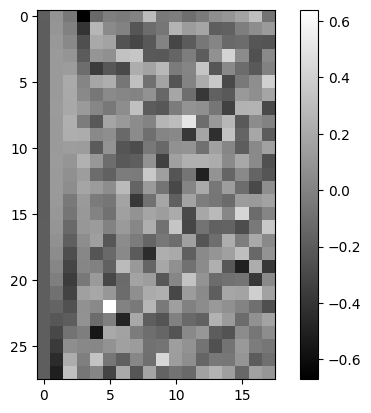

In [40]:
plt.imshow(my_flag, cmap = 'grey')
plt.colorbar()

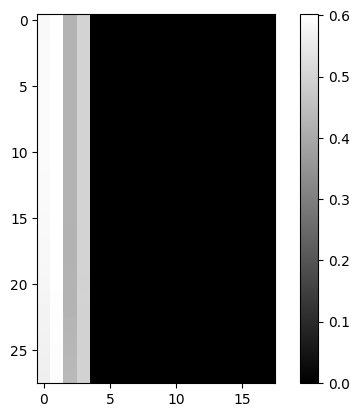

In [42]:

plt.imshow(D_out, cmap = 'grey')
plt.colorbar()